In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
import pickle
# Импорт библиотеки TensorFlow
import tensorflow as tf
from tensorflow import keras
from scipy.stats import shapiro
from scipy.stats import normaltest

In [ ]:
# Загрузить данные, подготовленные на предыдущем шаге
dat = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/data_clean.xlsx', index_col=0)
dat

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
1,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000,0,4.000000,60.000000
3,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000,0,5.000000,47.000000
4,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0,5.000000,57.000000
5,2.767918,2000.000000,748.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0,5.000000,60.000000
6,2.569620,1910.000000,807.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0,5.000000,70.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,90,9.076380,47.019770
1019,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,90,10.565614,53.750790
1020,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,90,4.161154,67.629684
1021,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,90,6.313201,58.261074


[Text(0, 0, 'Соотношение матрица-наполнитель'),
 Text(1, 0, 'Плотность, кг/м3'),
 Text(2, 0, 'модуль упругости, ГПа'),
 Text(3, 0, 'Количество отвердителя, м.%'),
 Text(4, 0, 'Содержание эпоксидных групп,%_2'),
 Text(5, 0, 'Температура вспышки, С_2'),
 Text(6, 0, 'Поверхностная плотность, г/м2'),
 Text(7, 0, 'Модуль упругости при растяжении, ГПа'),
 Text(8, 0, 'Прочность при растяжении, МПа'),
 Text(9, 0, 'Потребление смолы, г/м2'),
 Text(10, 0, 'Угол нашивки, град'),
 Text(11, 0, 'Шаг нашивки'),
 Text(12, 0, 'Плотность нашивки')]

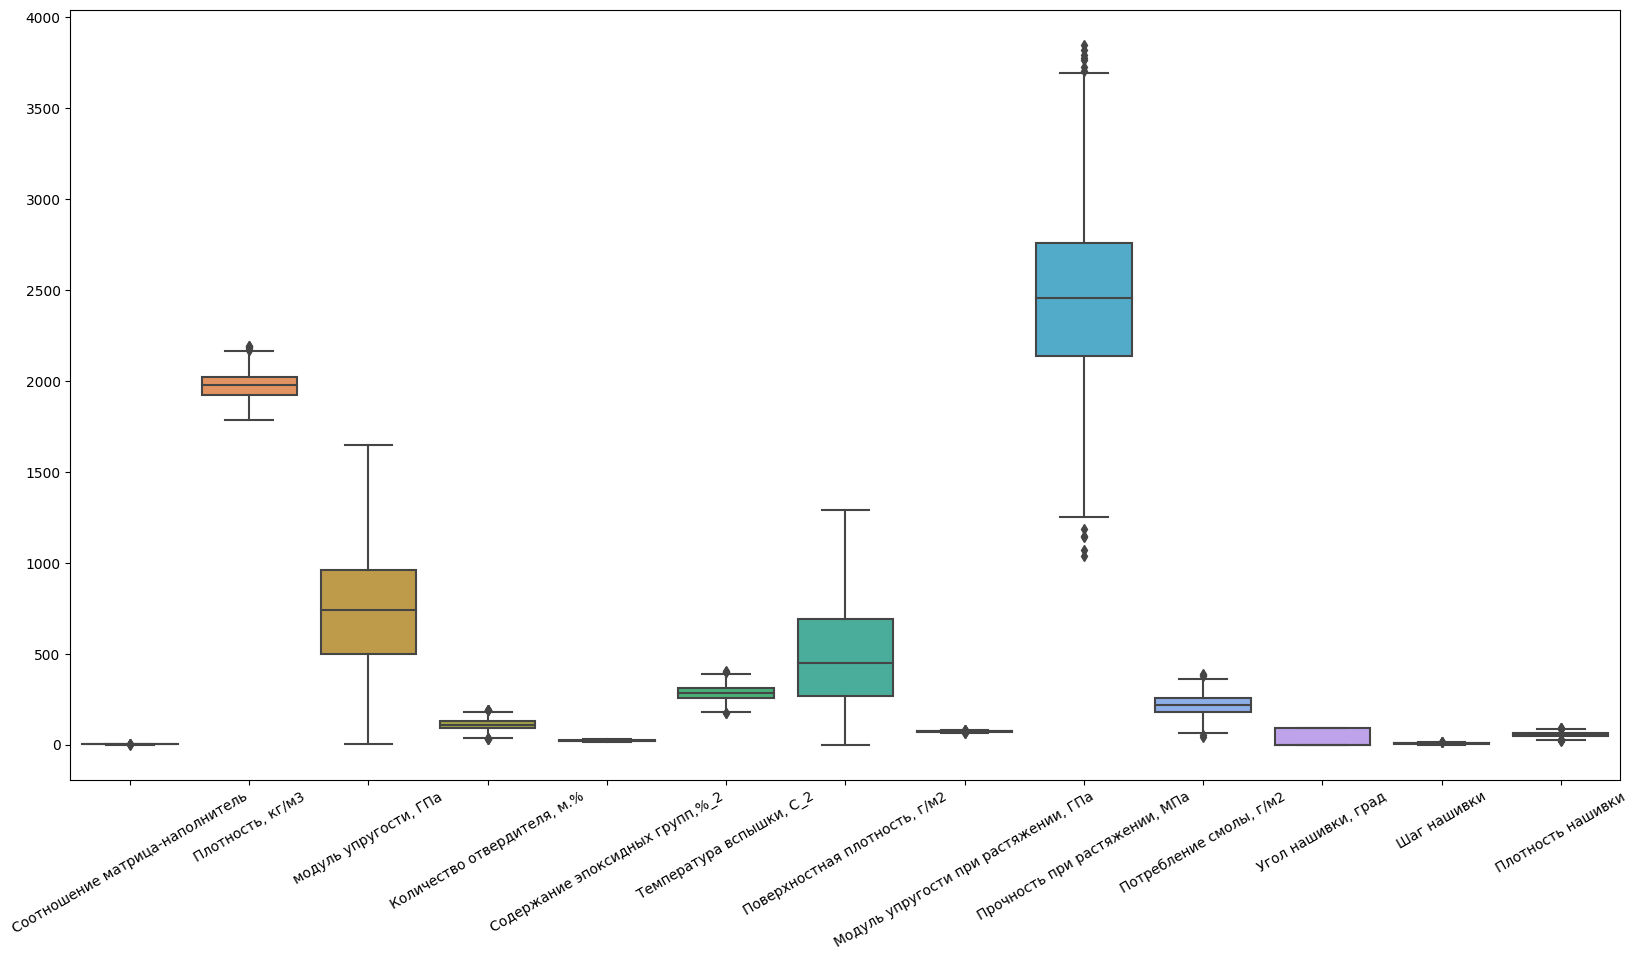

In [ ]:
# Построим вертикальный "ящик с усами", чтобы показать распределение данных по характеристикам:
plt.figure(figsize = (20,10))
ax = sns.boxplot(data = dat)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

In [ ]:
#Создадим переменную для нормализации:
ds_norm = dat.copy()

In [ ]:
#Нормализуем данные с помощью методов fit_transform и MinMaxScaler():
scaler = MinMaxScaler()
col = ds_norm.columns
result = scaler.fit_transform(dat)

ds_minmax_n = pd.DataFrame(result, columns = col)
ds_minmax_n.describe()


,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.489568,0.467648,0.447024,0.496427,0.493216,0.488654,0.371301,0.497322,0.507902,0.512370,0.496000,0.477193,0.507027
std,0.174687,0.178696,0.198876,0.171089,0.179818,0.174792,0.215155,0.167158,0.172506,0.170432,0.500234,0.177586,0.163634
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.370964,0.340831,0.302576,0.384097,0.368597,0.371985,0.206374,0.386234,0.390414,0.401220,0.000000,0.351886,0.405037
50%,0.484284,0.472347,0.448525,0.495388,0.492154,0.488205,0.348844,0.492609,0.504890,0.513653,0.000000,0.477999,0.509730
75%,0.608289,0.579727,0.582408,0.613258,0.624396,0.606271,0.535295,0.605138,0.612932,0.625772,1.000000,0.593714,0.612766
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: ylabel='Density'>

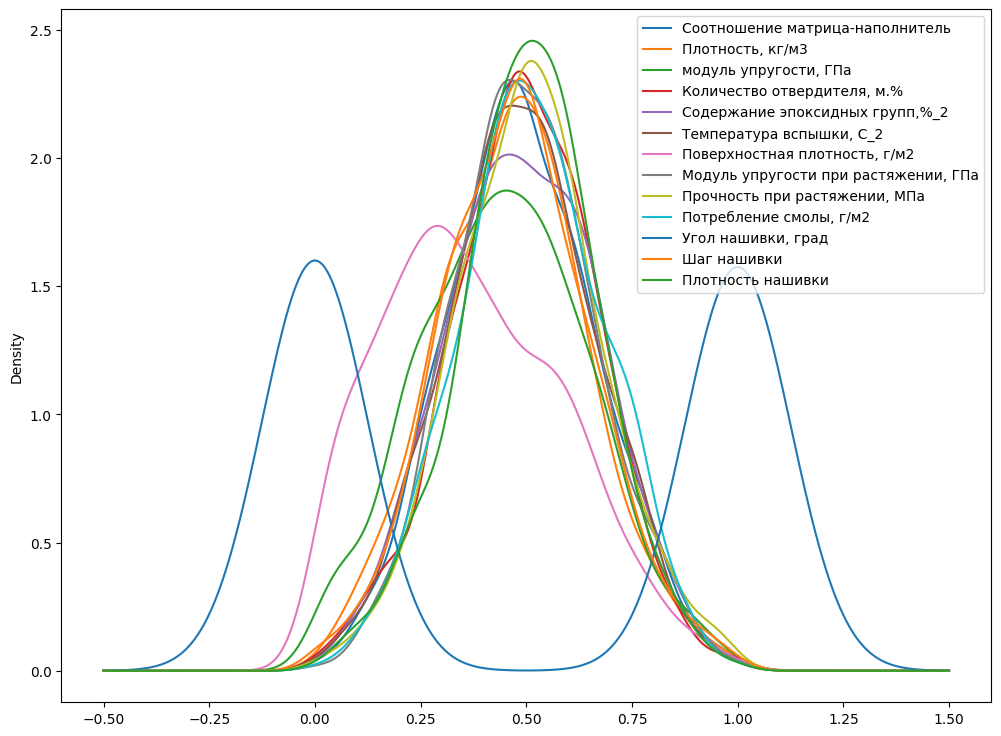

In [ ]:
#применим сглаживание ядра для оценки плотности вероятности распределения признаков Min Max:
fig, ax = plt.subplots(figsize = (12, 9))
ds_minmax_n.plot(kind = 'kde', ax = ax)

[Text(0, 0, 'Соотношение матрица-наполнитель'),
 Text(1, 0, 'Плотность, кг/м3'),
 Text(2, 0, 'модуль упругости, ГПа'),
 Text(3, 0, 'Количество отвердителя, м.%'),
 Text(4, 0, 'Содержание эпоксидных групп,%_2'),
 Text(5, 0, 'Температура вспышки, С_2'),
 Text(6, 0, 'Поверхностная плотность, г/м2'),
 Text(7, 0, 'Модуль упругости при растяжении, ГПа'),
 Text(8, 0, 'Прочность при растяжении, МПа'),
 Text(9, 0, 'Потребление смолы, г/м2'),
 Text(10, 0, 'Угол нашивки, град'),
 Text(11, 0, 'Шаг нашивки'),
 Text(12, 0, 'Плотность нашивки')]

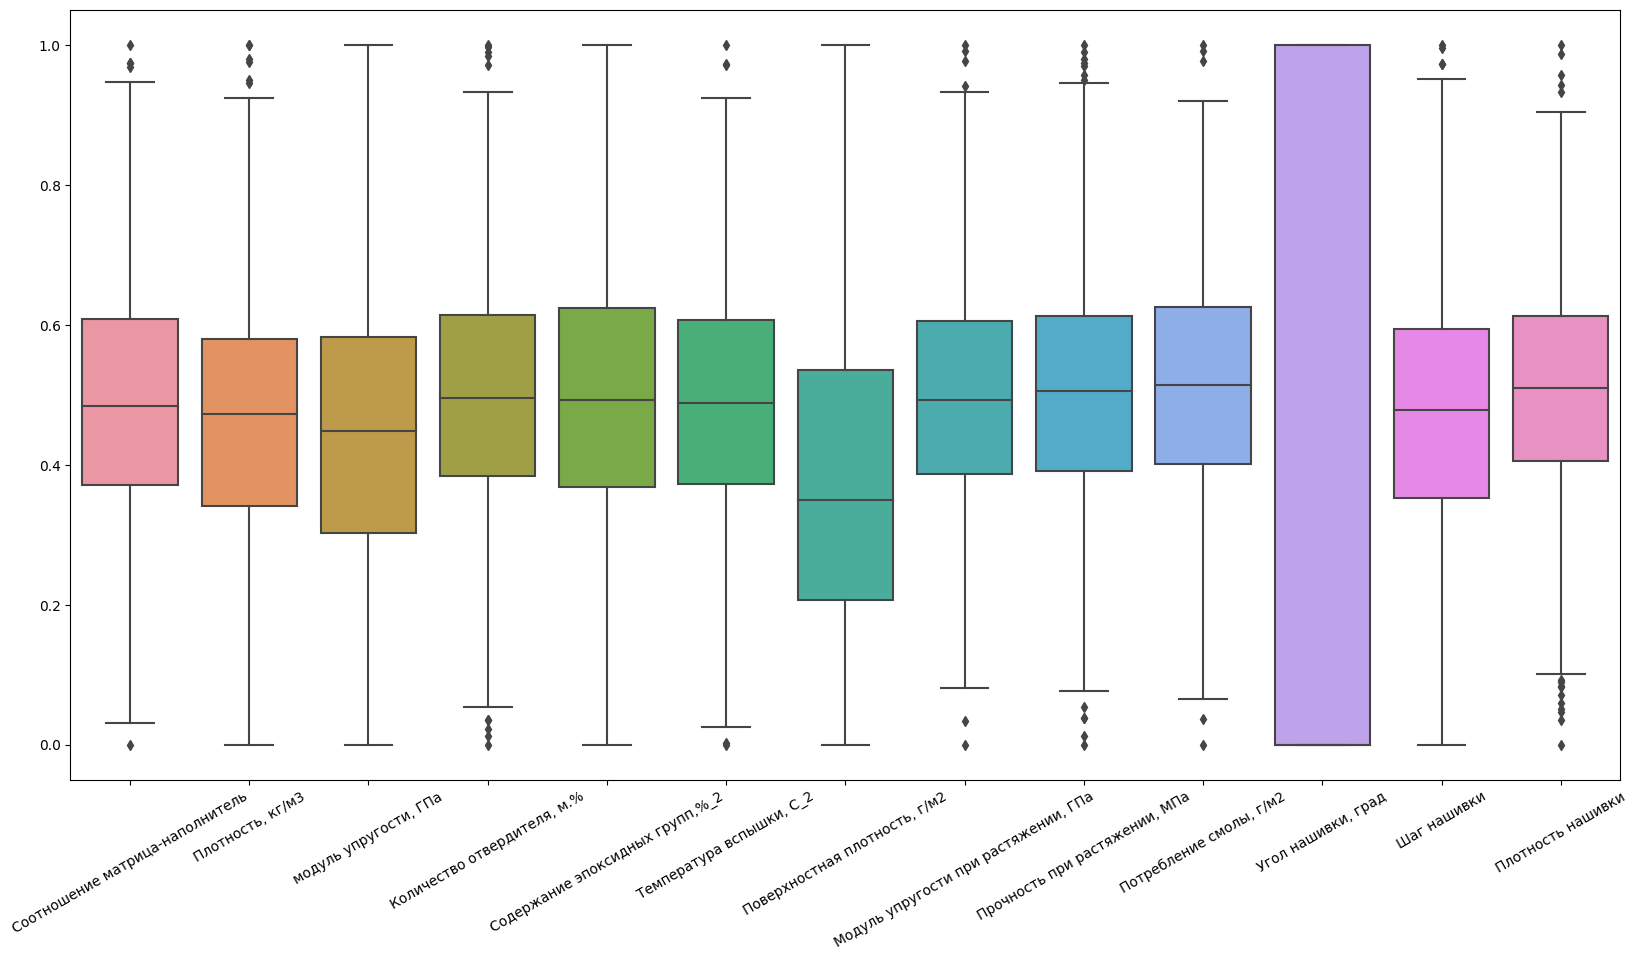

In [ ]:
# Построим вертикальный "ящик с усами", чтобы показать распределение данных по характеристикам Min Max:
plt.figure(figsize = (20,10))
ax = sns.boxplot(data =ds_minmax_n)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

In [ ]:
#Нормализуем данные с помощью методов fit_transform и RobustScaler():
scaler = RobustScaler()
col = ds_norm.columns
result = scaler.fit_transform(dat)

ds_RobustScaler = pd.DataFrame(result, columns = col)
ds_RobustScaler.describe()


,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,1.000000e+03,1000.000000,1.000000e+03,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1000.000000
mean,2.226408e-02,-0.019671,-5.365033e-03,0.004535,0.004153,1.916335e-03,6.827538e-02,2.153214e-02,1.353843e-02,-5.712515e-03,0.496000,-0.003329,-0.013012
std,7.360631e-01,0.748007,7.106986e-01,0.746589,0.702967,7.460602e-01,6.541250e-01,7.636117e-01,7.752467e-01,7.589881e-01,0.500234,0.734346,0.787728
min,-2.040588e+00,-1.977208,-1.602835e+00,-2.161747,-1.923987,-2.083791e+00,-1.060573e+00,-2.250338e+00,-2.268983e+00,-2.287452e+00,0.000000,-1.976602,-2.453821
25%,-4.774867e-01,-0.550517,-5.215593e-01,-0.485646,-0.483025,-4.960589e-01,-4.331432e-01,-4.859424e-01,-5.144571e-01,-5.006974e-01,0.000000,-0.521495,-0.503992
50%,-1.798454e-16,0.000000,-1.233280e-16,0.000000,0.000000,5.270307e-16,6.700369e-17,-1.742530e-15,-3.634333e-16,1.830133e-16,0.000000,0.000000,0.000000
75%,5.225133e-01,0.449483,4.784407e-01,0.514354,0.516975,5.039411e-01,5.668568e-01,5.140576e-01,4.855429e-01,4.993026e-01,1.000000,0.478505,0.496008
max,2.173033e+00,2.208715,1.970734e+00,2.202000,1.985333,2.184484e+00,1.979675e+00,2.317866e+00,2.225035e+00,2.165854e+00,1.000000,2.158562,2.360136


<Axes: ylabel='Density'>

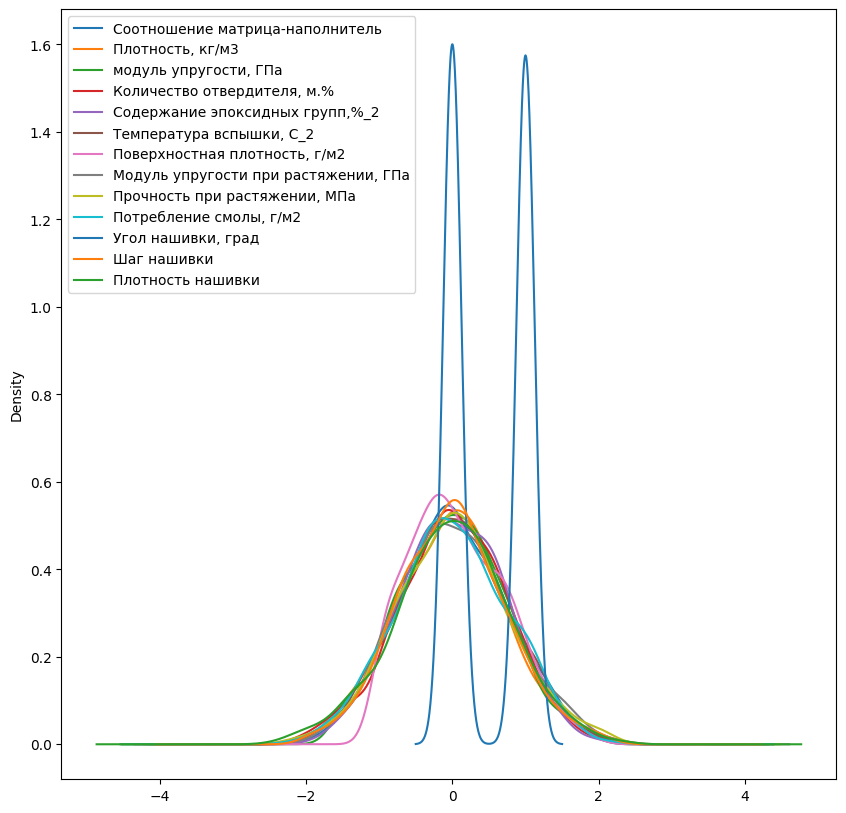

In [ ]:
#применим сглаживание ядра для оценки плотности вероятности распределения признаков:
fig, ax = plt.subplots(figsize = (10, 10))
ds_RobustScaler.plot(kind = 'kde', ax = ax)

[Text(0, 0, 'Соотношение матрица-наполнитель'),
 Text(1, 0, 'Плотность, кг/м3'),
 Text(2, 0, 'модуль упругости, ГПа'),
 Text(3, 0, 'Количество отвердителя, м.%'),
 Text(4, 0, 'Содержание эпоксидных групп,%_2'),
 Text(5, 0, 'Температура вспышки, С_2'),
 Text(6, 0, 'Поверхностная плотность, г/м2'),
 Text(7, 0, 'Модуль упругости при растяжении, ГПа'),
 Text(8, 0, 'Прочность при растяжении, МПа'),
 Text(9, 0, 'Потребление смолы, г/м2'),
 Text(10, 0, 'Угол нашивки, град'),
 Text(11, 0, 'Шаг нашивки'),
 Text(12, 0, 'Плотность нашивки')]

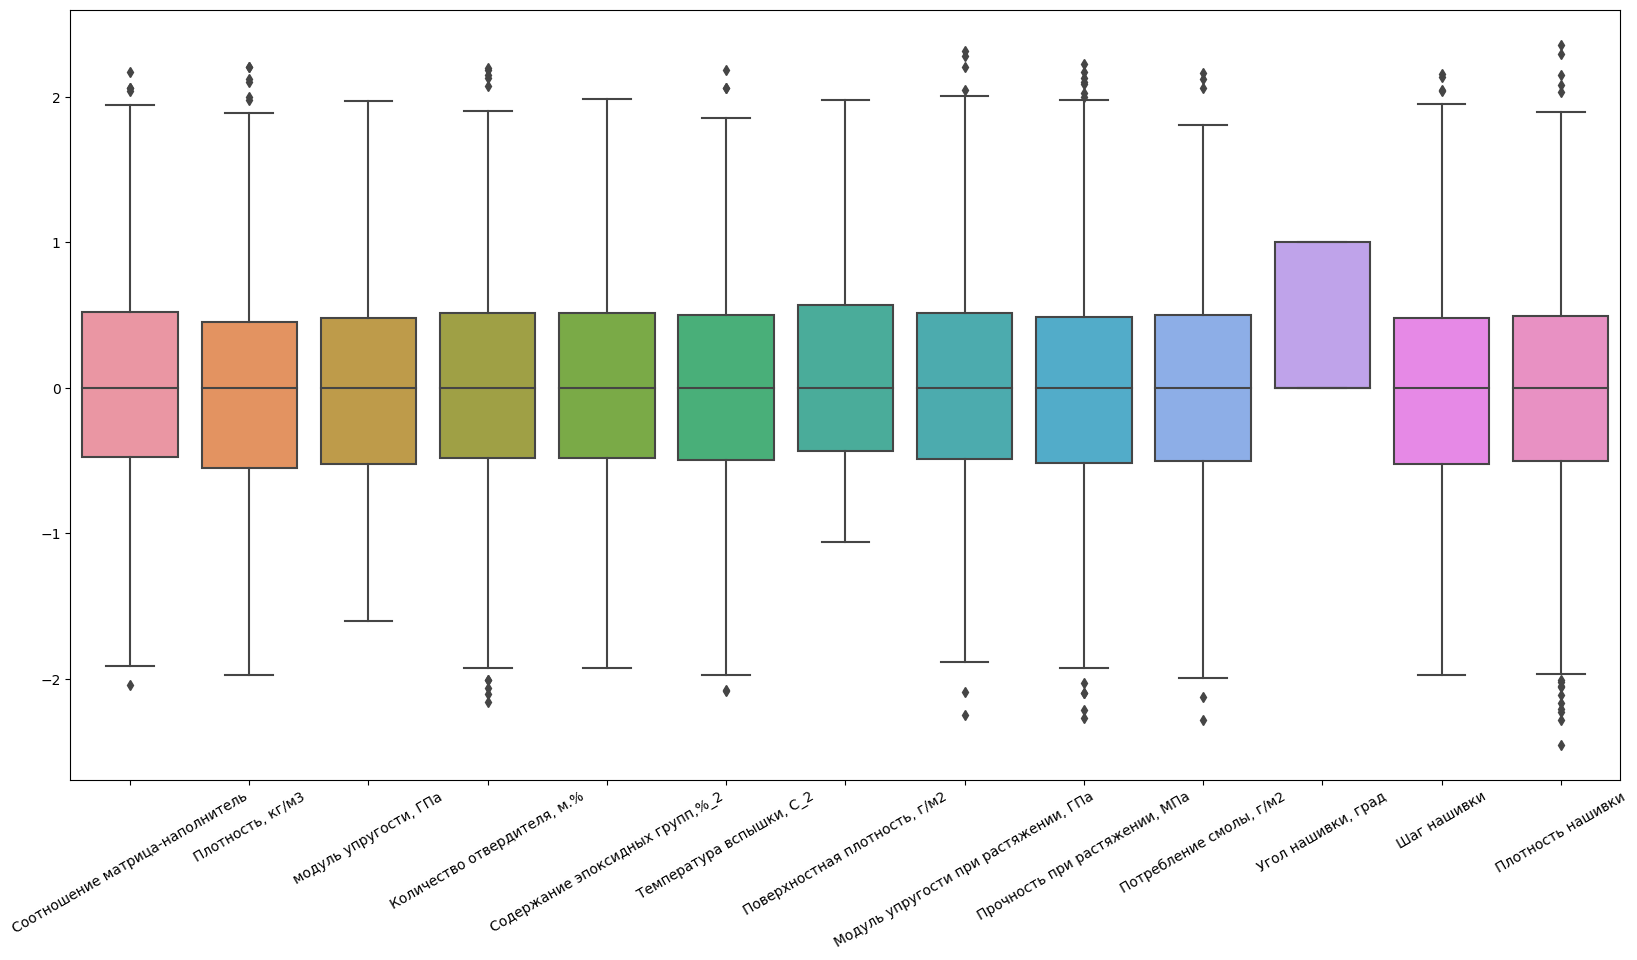

In [ ]:
# Построим вертикальный "ящик с усами", чтобы показать распределение данных по характеристикам:
plt.figure(figsize = (20,10))
ax = sns.boxplot(data = ds_RobustScaler)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

In [ ]:
#Нормализуем данные с помощью методов fit_transform и StandardScaler():
scaler = StandardScaler()
col = ds_norm.columns
result = scaler.fit_transform(dat)

ds_standart = pd.DataFrame(result, columns = col)
ds_standart.describe()


,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,1.314504e-16,-7.105427e-17,1.527667e-16,-2.877698e-16,-2.655653e-16,1.078249e-15,3.907985e-17,1.564082e-15,-6.785683e-16,-1.563194e-16,1.136868e-16,9.059420e-17,3.836931e-16
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-2.803951e+00,-2.618315e+00,-2.248871e+00,-2.903025e+00,-2.744234e+00,-2.797028e+00,-1.726601e+00,-2.976653e+00,-2.945726e+00,-3.007796e+00,-9.920317e-01,-2.688459e+00,-3.100091e+00
25%,-6.792907e-01,-7.100356e-01,-7.266830e-01,-6.568888e-01,-6.933787e-01,-6.678074e-01,-7.669321e-01,-6.649040e-01,-6.814086e-01,-6.524906e-01,-9.920317e-01,-7.059685e-01,-6.235973e-01
50%,-3.026265e-02,2.631099e-02,7.552734e-03,-6.077177e-03,-5.911242e-03,-2.569892e-03,-1.044289e-01,-2.821187e-02,-1.747212e-02,7.530255e-03,-9.920317e-01,4.535865e-03,1.652712e-02
75%,6.799682e-01,6.275201e-01,6.810873e-01,6.832070e-01,7.298752e-01,6.732378e-01,7.625927e-01,6.453174e-01,6.091489e-01,6.657124e-01,1.008032e+00,6.564680e-01,6.465110e-01
max,2.923452e+00,2.980590e+00,2.781893e+00,2.944814e+00,2.819721e+00,2.926921e+00,2.923534e+00,3.008705e+00,2.854064e+00,2.862566e+00,1.008032e+00,2.945439e+00,3.014156e+00


<Axes: ylabel='Density'>

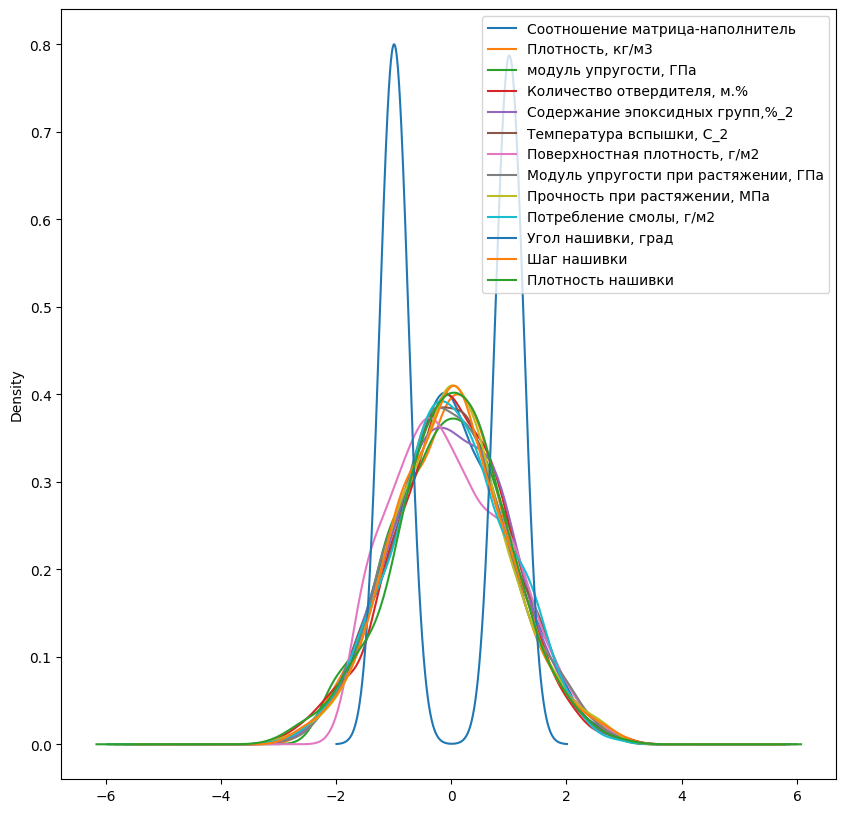

In [ ]:
#применим сглаживание ядра для оценки плотности вероятности распределения признаков:
fig, ax = plt.subplots(figsize = (10, 10))
ds_standart.plot(kind = 'kde', ax = ax)

[Text(0, 0, 'Соотношение матрица-наполнитель'),
 Text(1, 0, 'Плотность, кг/м3'),
 Text(2, 0, 'модуль упругости, ГПа'),
 Text(3, 0, 'Количество отвердителя, м.%'),
 Text(4, 0, 'Содержание эпоксидных групп,%_2'),
 Text(5, 0, 'Температура вспышки, С_2'),
 Text(6, 0, 'Поверхностная плотность, г/м2'),
 Text(7, 0, 'Модуль упругости при растяжении, ГПа'),
 Text(8, 0, 'Прочность при растяжении, МПа'),
 Text(9, 0, 'Потребление смолы, г/м2'),
 Text(10, 0, 'Угол нашивки, град'),
 Text(11, 0, 'Шаг нашивки'),
 Text(12, 0, 'Плотность нашивки')]

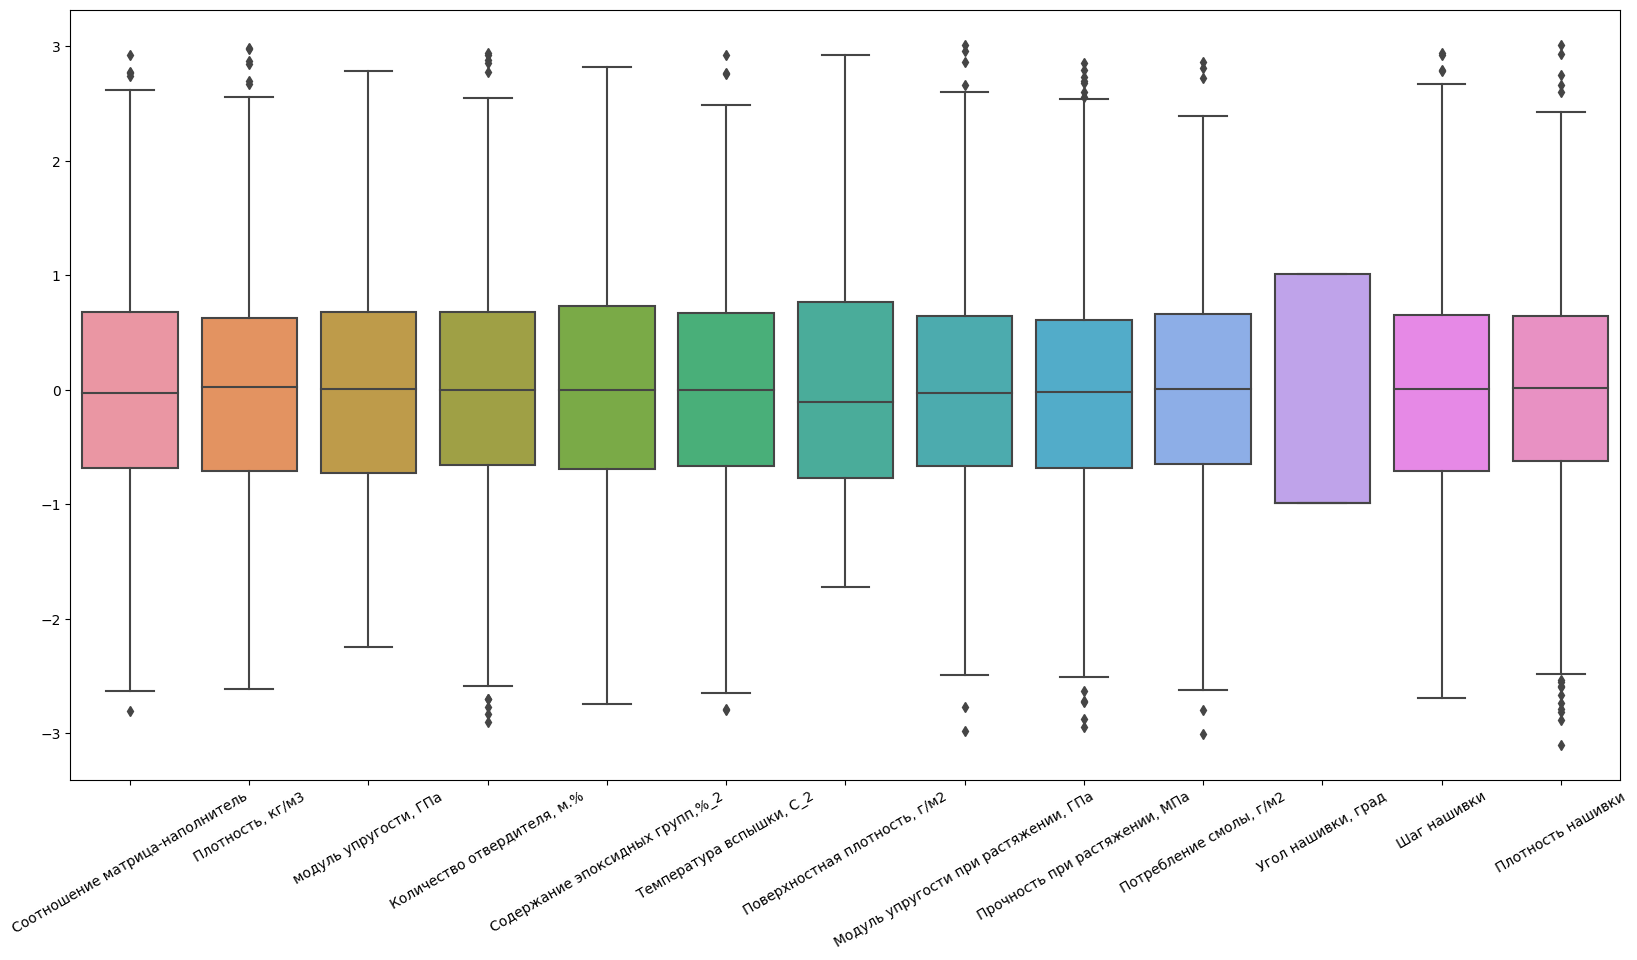

In [ ]:
# Построим вертикальный "ящик с усами", чтобы показать распределение данных по характеристикам:
plt.figure(figsize = (20,10))
ax = sns.boxplot(data = ds_standart)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

Видим что плотность вероятности распределния признаков находятся в одном диапозоне и примерно одинаковы, возьмем функцию RobustScaler для уменьшения влияния выбросов и график сглаживания ядра плотности распределния, показывает лучшие значения по сранению с остальными.